## Car Dataset Multiclass Classification
Here we can see MWEM shine on a Multiclass classification problem when the data is purely categorical. The synthetic data performs quite comparably to the original dataset, and way outperforms random guessing.

We can also note that the striking overlap between the synthetic data and the real data in the TSNE plot.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier

import utils

from snsynth import Synthesizer

from load_data import load_data

In [2]:
datasets = load_data(['car'])

Memory consumed by car:96896


In [4]:
synth = Synthesizer.create("mwem", epsilon=3.0, split_factor=7, verbose=True)
synth.fit(datasets['car']['data'])

Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5 6]
Columns: 7
Dimensionality: 6,912
Cuboids possible: 127
1-2-way cuboids possible: 28
Fitting for 40 iterations
Number of queries: 80
Number of slices in queries: 828
Per-Measure Epsilon: 0.037
Measurement Error: 61.40

[0] - Average error: 0.776. Selected 4 slices
[1] - Average error: 0.160. Selected 16 slices
[2] - Average error: 0.197. Selected 3 slices
[3] - Average error: 0.242. Selected 12 slices
[4] - Average error: 0.238. Selected 12 slices
[5] - Average error: 0.291. Selected 12 slices
[6] - Average error: 0.265. Selected 4 slices
[7] - Average error: 0.267. Selected 16 slices
[8] - Average error: 0.316. Selected 3 slices
[9] - Average error: 0.420. Selected 4 slices
[10] - Average error: 0.435. Selected 12 slices
[11] - Average error: 0.374. Selected 12 slices
[12] - Average error: 0.350. Selected 4 slices
[13] - Average error: 0.349. Selected 4 slices
[14] - Average error: 0.350. Selected 16 slices
[15] - Average err

In [5]:
sample_size = len(datasets['car']['data'])
synthetic = synth.sample(int(sample_size))


Trained on Real Data
              precision    recall  f1-score   support

           0       0.29      0.11      0.16        83
           1       0.00      0.00      0.00        11
           2       0.71      0.95      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.67       346
   macro avg       0.25      0.27      0.24       346
weighted avg       0.55      0.67      0.59       346

Accuracy real: 0.6734104046242775

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.34      0.20      0.26        83
           1       0.00      0.00      0.00        11
           2       0.73      0.92      0.82       235
           3       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.27      0.28      0.27       346
weighted avg       0.58      0.68      0.62       346

Accuracy synthetic: 0.6763005780346821

Random 

/Users/joshuaallen/mininconda3-arm/envs/synth/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshuaallen/mininconda3-arm/envs/synth/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshuaallen/mininconda3-arm/envs/synth/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

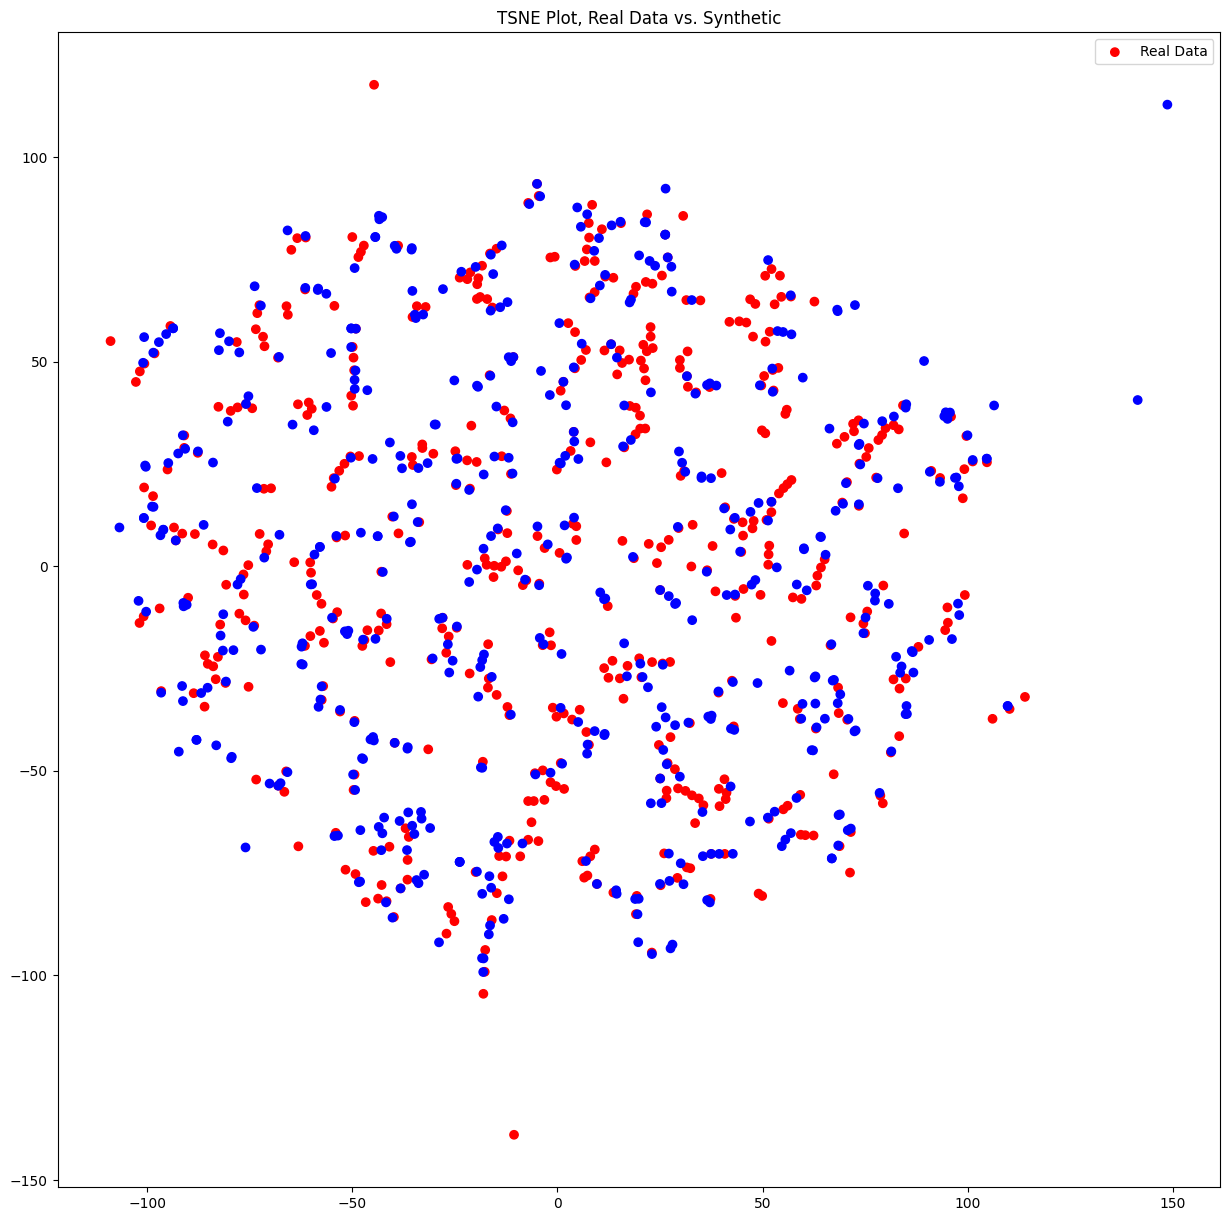

            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.750000     0.750000     0.000000     0.000000   
50%       1.500000     1.500000     1.500000     1.000000     1.000000   
75%       2.250000     2.250000     2.250000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000     2.000000   

            safety        class  
count  1728.000000  1728.000000  
mean      1.000000     1.553241  
std       0.816733     0.875948  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       1.000000     2.000000  
75%       2.000000     2.000000  
max       2.000000     3.000000  
            buying        m

(RidgeClassifier(), RidgeClassifier())

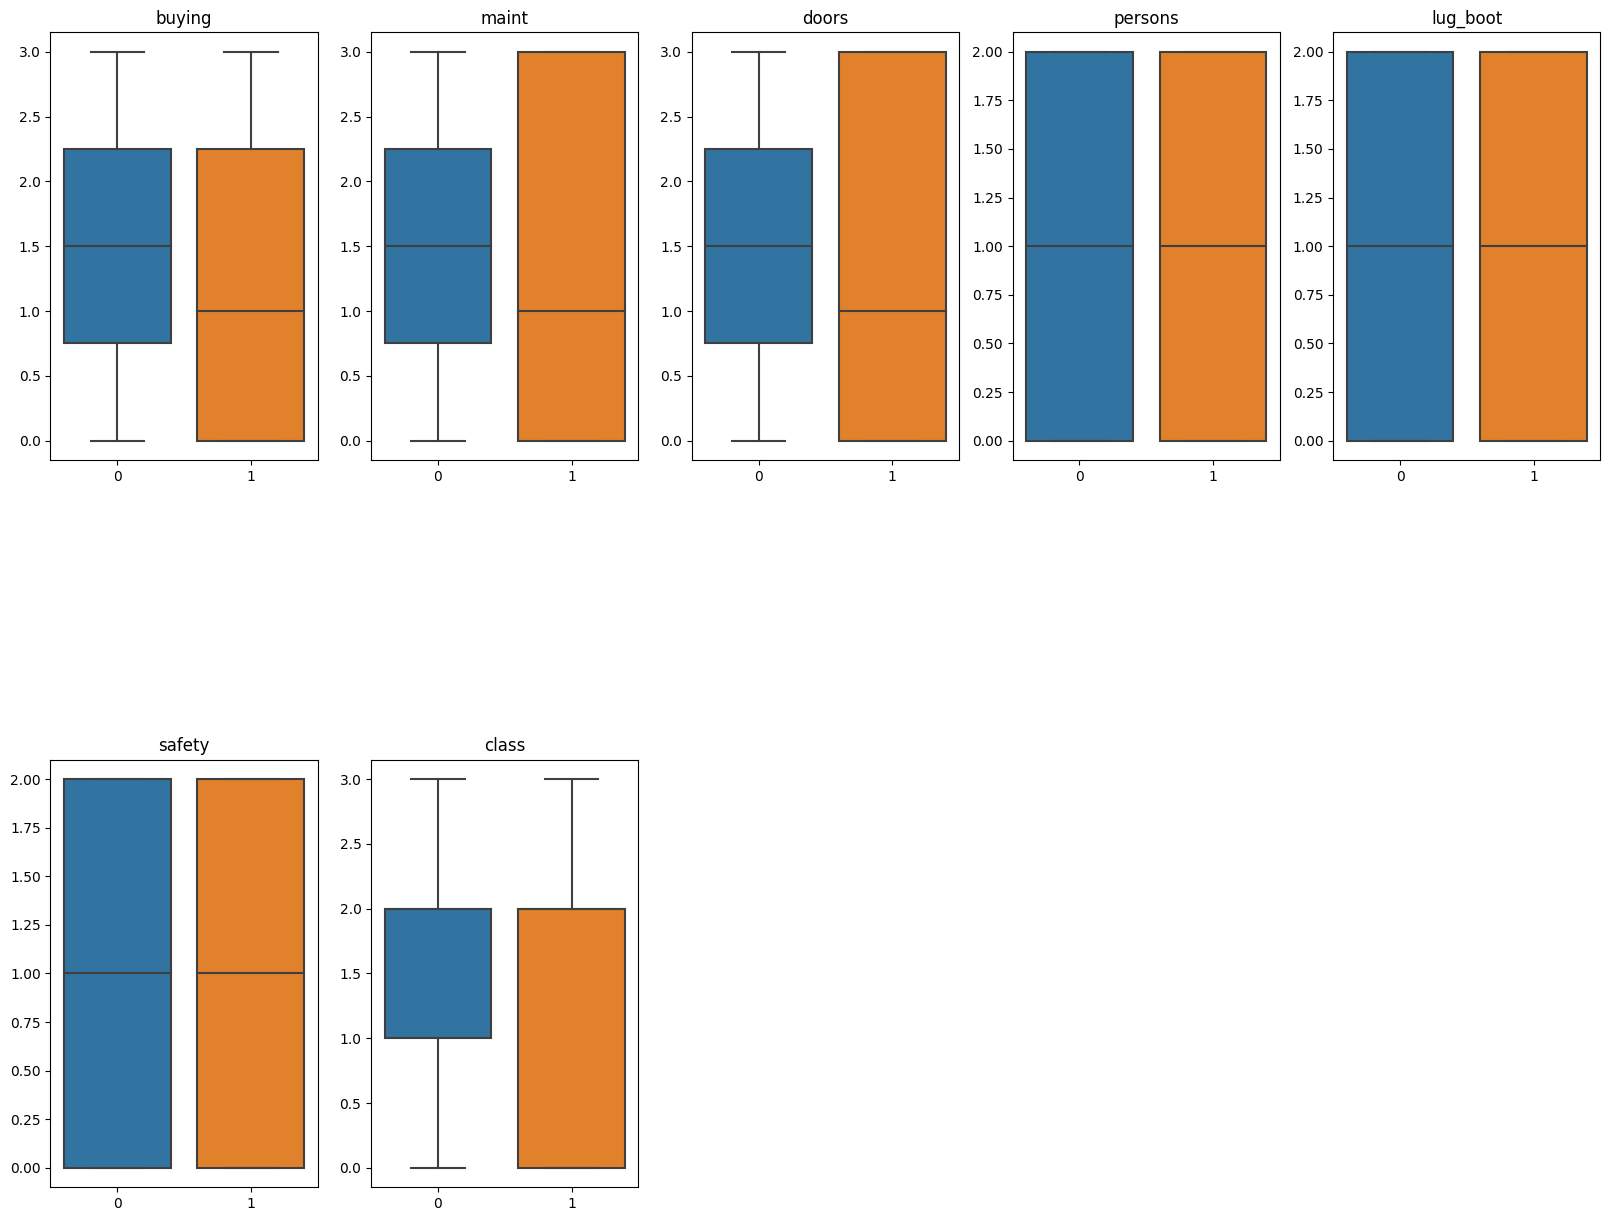

In [6]:
utils.test_real_vs_synthetic_data(datasets['car']['data'], synthetic, RidgeClassifier, tsne=True, box=True, describe=True)